# Supplemental Dataframes Cleaning and Wrangling

# Contents

# 01. Set up environment

# 02. song_streams data wrangling (cleaning and consistency checks)

# 03. album_sales data wrangling (cleaning and consistency checks)

# 04. bill_top_songs data wrangling (cleaning and consistency checks)

# 05. bill_top_albums data wrangling (cleaning and consistency checks)

# 06. Exporting cleaned data sets

# 01. Set up environment

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os

In [2]:
# Import visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Create path

path = r"C:\Users\leobs\OneDrive\Desktop\LF_TS_Analysis"

In [4]:
# Import original song_streams dataframe

df_song_streams = pd.read_csv(os.path.join(path,'01 Sourced Data', 'Main Dataframes', 'leo_complete_song_list.csv'), index_col = False)

In [5]:
# Import original album_sales dataframe

df_album_sales = pd.read_csv(os.path.join(path,'01 Sourced Data', 'Main Dataframes', 'ts_album_sales.csv'), index_col = False)

In [6]:
# Import original bill_top_songs dataframe

df_bill_top_songs = pd.read_csv(os.path.join(path,'01 Sourced Data', 'Main Dataframes', 'billboard_hot-100-songs_1958_to_nov2023.csv'), index_col = False)

In [7]:
# Import original bill_top_albums dataframe

df_bill_top_albums = pd.read_csv(os.path.join(path,'01 Sourced Data', 'Main Dataframes', 'billboard-200-albums_1967_to_nov2023.csv'), index_col = False)

# 02. song_streams cleaning and wrangling

In [8]:
# Check dataframe import

df_song_streams.head(10)

,song_id,track_number,song_title,spotify_plays,track_length,album_title,album_id,release_date,updated
0,TS01,1,Tim McGraw,"112,816,077",NaN,Taylor Swift,DEBUT,10/24/2006,11/9/2023
1,TS02,2,Picture To Burn,"163,382,463",NaN,Taylor Swift,DEBUT,10/24/2006,11/9/2023
2,TS03,3,Teardrops On My Guitar - Radio Single Remix,"191,317,513",NaN,Taylor Swift,DEBUT,10/24/2006,11/9/2023
3,TS04,4,A Place in this World,"34,771,836",NaN,Taylor Swift,DEBUT,10/24/2006,11/9/2023
4,TS05,5,Cold As You,"35,979,422",NaN,Taylor Swift,DEBUT,10/24/2006,11/9/2023
5,TS06,6,The Outside,"24,615,529",NaN,Taylor Swift,DEBUT,10/24/2006,11/9/2023
6,TS07,7,Tied Together with a Smile,"27,809,046",NaN,Taylor Swift,DEBUT,10/24/2006,11/9/2023
7,TS08,8,Stay Beautiful,"29,504,431",NaN,Taylor Swift,DEBUT,10/24/2006,11/9/2023
8,TS09,9,Should've Said No,"103,848,381",NaN,Taylor Swift,DEBUT,10/24/2006,11/9/2023
9,TS10,10,Mary's Song (Oh My My My),"37,893,761",NaN,Taylor Swift,DEBUT,10/24/2006,11/9/2023


In [9]:
# Check dataframe foot

df_song_streams.tail(10)

,song_id,track_number,song_title,spotify_plays,track_length,album_title,album_id,release_date,updated
520,FEAR02,2,Untouchable,"21,532,839",5:11,Fearless Platinum Edition,FEAR,11/11/2008,11/9/2023
521,RED21,21,Red - Original Demo Recording,"17,153,175",3:46,Red (Deluxe Edition),RED,10/22/2012,11/9/2023
522,1989TV22,22,Bad Blood (feat. Kendrick Lamar) (Taylor's Ver...,"17,075,733",3:19,1989 (Taylor's Version) [Deluxe],1989TV,10/27/2023,11/9/2023
523,RED20,20,Treacherous - Original Demo Recording,"16,242,772",3:59,Red (Deluxe Edition),RED,10/22/2012,11/9/2023
524,FEAR04,4,Come In With The Rain,"15,968,974",3:58,Fearless Platinum Edition,FEAR,11/11/2008,11/9/2023
525,FEAR06,6,The Other Side Of The Door,"14,228,895",3:57,Fearless Platinum Edition,FEAR,11/11/2008,11/9/2023
526,FEAR05,5,SuperStar,"13,160,501",4:21,Fearless Platinum Edition,FEAR,11/11/2008,11/9/2023
527,198917,17,I Know Places - Voice Memo,"5,829,179",3:36,1989 (Deluxe Edition),1989,10/27/2014,11/9/2023
528,198919,19,Blank Space - Voice Memo,"4,717,219",2:11,1989 (Deluxe Edition),1989,10/27/2014,11/9/2023
529,198918,18,I Wish You Would - Voice Memo,"4,443,209",1:47,1989 (Deluxe Edition),1989,10/27/2014,11/9/2023


In [10]:
df_song_streams.shape

(530, 9)

In [11]:
# Check columns, data types, and counts

df_song_streams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   song_id         530 non-null    object
 1   track_number    530 non-null    int64 
 2   song_title      530 non-null    object
 3   spotify_plays   426 non-null    object
 4   track_length    411 non-null    object
 5   album_title     530 non-null    object
 6   album_id        530 non-null    object
 7   release_date    530 non-null    object
 8   updated         530 non-null    object
dtypes: int64(1), object(8)
memory usage: 37.4+ KB


Observations: All columns named correctly, except will change the "updated" header. spotify_plays and track_length have missing values. Df was created to have all information for only relevant albums. Will investigate if have complete info for album list. Unexpected to have different number of non-nulls for these variables. Data types for song_id, track_number, song_title, album_title, album_id, release_date, and updated are all accurate. Need to change spotify_plays to int64, and track_length if possible. If needed can use track_lengths in miliseconds from the song_info_clean df within a merge. 

In [12]:
df_song_streams.describe()

,track_number
count,530.000000
mean,11.183019
std,7.980037
min,1.000000
25%,5.000000
50%,10.000000
75%,15.000000
max,46.000000


Similar values to other df with similar info. Will rerun descriptive stats once change data types and remove irrelevant songs.

In [13]:
num_songs_unique = df_song_streams['song_id'].nunique()

In [14]:
num_songs_unique

512

Need to remove the unneeded albums before checking all of the value counts for neeeded columns

## Column renames

In [15]:
df_song_streams.columns

Index(['song_id', 'track_number', 'song_title', 'spotify_plays ',
       'track_length', 'album_title', 'album_id', 'release_date', 'updated'],
      dtype='object')

In [16]:
df_song_streams.rename(columns = {'updated': 'last_update', 'spotify_plays ': 'tot_spot_plays_song', 'release_date' : 'album_release_date'}, inplace=True)

In [17]:
df_song_streams.columns

Index(['song_id', 'track_number', 'song_title', 'tot_spot_plays_song',
       'track_length', 'album_title', 'album_id', 'album_release_date',
       'last_update'],
      dtype='object')

## Check for missing values and remove unneeded song information

In [18]:
df_song_streams.isnull().sum()

song_id                  0
track_number             0
song_title               0
tot_spot_plays_song    104
track_length           119
album_title              0
album_id                 0
album_release_date       0
last_update              0
dtype: int64

In [19]:
df_song_streams_spot_plays_nan = df_song_streams[df_song_streams['tot_spot_plays_song'].isnull() ==True]

In [20]:
df_song_streams_spot_plays_nan

,song_id,track_number,song_title,tot_spot_plays_song,track_length,album_title,album_id,album_release_date,last_update
15,OTHERCLEAR01,1,Love Story - Live From Clear Channel Stripped ...,NaN,NaN,Live From Clear Channel Stripped 2008,OTHERCLEAR,6/28/2008,11/9/2023
16,OTHERCLEAR02,2,Fearless - Live From Clear Channel Stripped 2008,NaN,NaN,Live From Clear Channel Stripped 2008,OTHERCLEAR,6/28/2008,11/9/2023
17,OTHERCLEAR03,3,Beautiful Eyes - Live From Clear Channel Strip...,NaN,NaN,Live From Clear Channel Stripped 2008,OTHERCLEAR,6/28/2008,11/9/2023
18,OTHERCLEAR04,4,Untouchable - Live From Clear Channel Stripped...,NaN,NaN,Live From Clear Channel Stripped 2008,OTHERCLEAR,6/28/2008,11/9/2023
19,OTHERCLEAR05,5,Teardrops On My Guitar - Live From Clear Chann...,NaN,NaN,Live From Clear Channel Stripped 2008,OTHERCLEAR,6/28/2008,11/9/2023
...,...,...,...,...,...,...,...,...,...
316,OTHERFOLK15,15,peace - the long pond studio sessions,NaN,NaN,folklore: the long pond studio sessions (from ...,OTHERFOLK,11/25/2020,11/9/2023
317,OTHERFOLK16,16,hoax,NaN,NaN,folklore: the long pond studio sessions (from ...,OTHERFOLK,11/25/2020,11/9/2023
318,OTHERFOLK16,16,hoax - the long pond studio sessions,NaN,NaN,folklore: the long pond studio sessions (from ...,OTHERFOLK,11/25/2020,11/9/2023
319,OTHERFOLK17,17,the lakes - bonus track,NaN,NaN,folklore: the long pond studio sessions (from ...,OTHERFOLK,11/25/2020,11/9/2023


In [21]:
df_song_streams['album_title'].value_counts()

album_title
reputation Stadium Tour Surprise Song Playlist                                         46
folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]    34
Red (Taylor's Version)                                                                 30
Fearless (Taylor's Version)                                                            26
Midnights (The Til Dawn Edition)                                                       23
Speak Now (Taylor's Version)                                                           22
1989 (Taylor's Version) [Deluxe]                                                       22
Red (Deluxe Edition)                                                                   22
1989 (Taylor's Version)                                                                21
Midnights (3am Edition)                                                                20
Speak Now (Deluxe Edition)                                                             2

Observation: Will remove the following unneeded albums, as they are shorter versions or not studio albums: 

reputation Stadium Tour Surprise Song Playlist
folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]
1989 (Taylor's Version)
Midnights (3am Edition)
folklore, 
Red, 
Speak Now World Tour Live, 
evermore, 
Speak Now, 
Midnights, 
1989, 
Fearless, 
Live From Clear Channel Stripped 2008

These are albums with either song repeats from long studio albums or non-studio albums and are not part of this analysis.
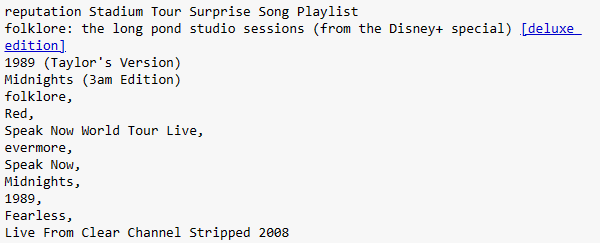

The list of the 14 albums included in this analysis are as follows:
Red (Taylor's Version)              30 tracks, album_id = REDTV
Fearless (Taylor's Version)         26 tracks, album_id = FEARTV
Midnights (The Til Dawn Edition)    23 tracks, album_id = MIDN
1989 (Taylor's Version) [Deluxe]    22 tracks, album_id = 1989TV
Speak Now (Taylor's Version)        22 tracks, album_id = SPEAKTV
Red (Deluxe Edition)                22 tracks, album_id = RED
Speak Now (Deluxe Edition)          20 tracks, album_id = SPEAK
1989 (Deluxe Edition)               19 tracks, album_id = 1989
Fearless Platinum Edition           19 tracks, album_id = FEAR
Lover                               18 tracks, album_id = LOVE
evermore (deluxe version)           17 tracks, album_id = EVER
folklore (deluxe version)           17 tracks, album_id = FOLK
reputation                          15 tracks, album_id = REP
Debut                               15 tracks, album_id = DEBUT
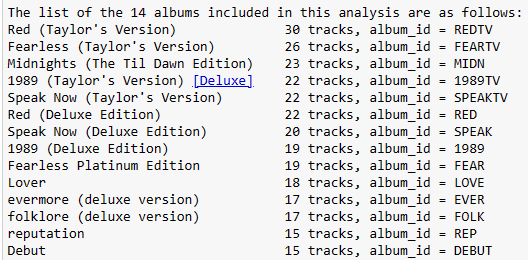

In [22]:
# Subset dataframe for unused albums

df_song_streams_no_use = df_song_streams.loc[df_song_streams['album_title'].isin(["reputation Stadium Tour Surprise Song Playlist",
                                "folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]",
                                "1989 (Taylor's Version)",
                                "Midnights (3am Edition)",
                                "Folklore",
                                "Red",
                                "Speak Now World Tour Live",
                                "evermore",
                                "Speak Now",
                                "1989",
                                "Midnights",
                                "Fearless",
                                "Live From Clear Channel Stripped 2008"])]

In [23]:
df_song_streams_no_use

,song_id,track_number,song_title,tot_spot_plays_song,track_length,album_title,album_id,album_release_date,last_update
15,OTHERCLEAR01,1,Love Story - Live From Clear Channel Stripped ...,NaN,NaN,Live From Clear Channel Stripped 2008,OTHERCLEAR,6/28/2008,11/9/2023
16,OTHERCLEAR02,2,Fearless - Live From Clear Channel Stripped 2008,NaN,NaN,Live From Clear Channel Stripped 2008,OTHERCLEAR,6/28/2008,11/9/2023
17,OTHERCLEAR03,3,Beautiful Eyes - Live From Clear Channel Strip...,NaN,NaN,Live From Clear Channel Stripped 2008,OTHERCLEAR,6/28/2008,11/9/2023
18,OTHERCLEAR04,4,Untouchable - Live From Clear Channel Stripped...,NaN,NaN,Live From Clear Channel Stripped 2008,OTHERCLEAR,6/28/2008,11/9/2023
19,OTHERCLEAR05,5,Teardrops On My Guitar - Live From Clear Chann...,NaN,NaN,Live From Clear Channel Stripped 2008,OTHERCLEAR,6/28/2008,11/9/2023
...,...,...,...,...,...,...,...,...,...
506,FEARNOUSE13,13,Change,"25,774,421",4:40,Fearless,FEARNOUSE,11/11/2008,11/9/2023
507,1989TVNOUSE12,12,I Know Places (Taylor's Version),"25,162,350",3:15,1989 (Taylor's Version),1989TVNOUSE,10/26/2023,11/9/2023
509,1989TVNOUSE10,10,How You Get The Girl (Taylor's Version),"24,935,822",4:07,1989 (Taylor's Version),1989TVNOUSE,10/26/2023,11/9/2023
513,1989TVNOUSE14,14,Wonderland (Taylor's Version),"24,335,546",4:05,1989 (Taylor's Version),1989TVNOUSE,10/26/2023,11/9/2023


In [24]:
# Select dataframe to use with only relevant albums. Choosing the album with the most songs (ex: Deluxe) to include complete relevant song list.

stud_alb_song_streams = df_song_streams.loc[df_song_streams['album_title'].isin(['Taylor Swift',
                                                                    'Fearless Platinum Edition',
                                                                    'Speak Now (Deluxe Edition)',
                                                                    'Red (Deluxe Edition)',
                                                                    '1989 (Deluxe Edition)',
                                                                    'reputation',
                                                                    'Lover',
                                                                    'folklore (deluxe version)',
                                                                    'evermore (deluxe version)',
                                                                    "Fearless (Taylor's Version)",
                                                                    "Red (Taylor's Version)",
                                                                    "Midnights (The Til Dawn Edition)",
                                                                    "Speak Now (Taylor's Version)",
                                                                    "1989 (Taylor's Version) [Deluxe]"])]


In [25]:
stud_alb_song_streams['album_title'].value_counts(dropna=False)

album_title
Red (Taylor's Version)              30
Fearless (Taylor's Version)         26
Midnights (The Til Dawn Edition)    23
Red (Deluxe Edition)                22
1989 (Taylor's Version) [Deluxe]    22
Speak Now (Taylor's Version)        22
Speak Now (Deluxe Edition)          20
1989 (Deluxe Edition)               19
Fearless Platinum Edition           19
Lover                               18
folklore (deluxe version)           17
evermore (deluxe version)           17
Taylor Swift                        15
reputation                          15
Name: count, dtype: int64

In [26]:
stud_alb_song_streams.shape

(285, 9)

Accurate list of needed albums. Will now change Taylor Swift to Debut for album title clarity and matching with other dataframes.

In [27]:
stud_alb_song_streams['album_title'].replace({"Taylor Swift":"Debut"}, inplace=True)

C:\Users\leobs\AppData\Local\Temp\ipykernel_9256\3738828241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_alb_song_streams['album_title'].replace({"Taylor Swift":"Debut"}, inplace=True)


In [28]:
stud_alb_song_streams['album_title'].value_counts()

album_title
Red (Taylor's Version)              30
Fearless (Taylor's Version)         26
Midnights (The Til Dawn Edition)    23
Red (Deluxe Edition)                22
1989 (Taylor's Version) [Deluxe]    22
Speak Now (Taylor's Version)        22
Speak Now (Deluxe Edition)          20
1989 (Deluxe Edition)               19
Fearless Platinum Edition           19
Lover                               18
folklore (deluxe version)           17
evermore (deluxe version)           17
Debut                               15
reputation                          15
Name: count, dtype: int64

## Data types

In [29]:
stud_alb_song_streams.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 0 to 529
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   song_id              285 non-null    object
 1   track_number         285 non-null    int64 
 2   song_title           285 non-null    object
 3   tot_spot_plays_song  285 non-null    object
 4   track_length         270 non-null    object
 5   album_title          285 non-null    object
 6   album_id             285 non-null    object
 7   album_release_date   285 non-null    object
 8   last_update          285 non-null    object
dtypes: int64(1), object(8)
memory usage: 22.3+ KB


Observations: dataframe cut to include only needed information, will now explore data types, check for missing values (there appears to be 15 missing values from track_length, and find duplicates before completing final descriptive stats and value counts.

In [30]:
# Check for mixed data types

for col in stud_alb_song_streams.columns.tolist():
    weird = (stud_alb_song_streams[[col]].applymap(type) !=stud_alb_song_streams[[col]].iloc[0].apply(type)).any(axis = 1)                                                                             
    if len (stud_alb_song_streams[weird]) > 0:
        print (col)

track_length


C:\Users\leobs\AppData\Local\Temp\ipykernel_9256\310721610.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (stud_alb_song_streams[[col]].applymap(type) !=stud_alb_song_streams[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_9256\310721610.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (stud_alb_song_streams[[col]].applymap(type) !=stud_alb_song_streams[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_9256\310721610.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (stud_alb_song_streams[[col]].applymap(type) !=stud_alb_song_streams[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_9256\310721610.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (stud_alb_song_streams[[col]].applymap(

track_length column has mixed types. Also need to update total song streams

In [31]:
# Check values for spotify plays to address data type

stud_alb_song_streams['tot_spot_plays_song'].head(100)

0      112,816,077
1      163,382,463
2      191,317,513
3       34,771,836
4       35,979,422
          ...     
221    230,228,150
222     64,127,920
224    227,198,947
226    223,687,941
229    221,693,784
Name: tot_spot_plays_song, Length: 100, dtype: object

In [32]:
# Remove commas from spotify plays

stud_alb_song_streams['tot_spot_plays_song'] = stud_alb_song_streams['tot_spot_plays_song'].str.replace(',', '')

C:\Users\leobs\AppData\Local\Temp\ipykernel_9256\2609658221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_alb_song_streams['tot_spot_plays_song'] = stud_alb_song_streams['tot_spot_plays_song'].str.replace(',', '')


In [33]:
stud_alb_song_streams['tot_spot_plays_song'].head(100)

0      112816077
1      163382463
2      191317513
3       34771836
4       35979422
         ...    
221    230228150
222     64127920
224    227198947
226    223687941
229    221693784
Name: tot_spot_plays_song, Length: 100, dtype: object

In [34]:
# Change total streams to an integer value now that commas are removed

stud_alb_song_streams['tot_spot_plays_song'] = stud_alb_song_streams['tot_spot_plays_song'].astype(int)

C:\Users\leobs\AppData\Local\Temp\ipykernel_9256\2237190584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_alb_song_streams['tot_spot_plays_song'] = stud_alb_song_streams['tot_spot_plays_song'].astype(int)


In [35]:
stud_alb_song_streams.dtypes

song_id                object
track_number            int64
song_title             object
tot_spot_plays_song     int32
track_length           object
album_title            object
album_id               object
album_release_date     object
last_update            object
dtype: object

In [36]:
stud_alb_song_streams['track_length'].value_counts(dropna=False)

track_length
NaN     15
3:40     9
3:51     9
4:05     8
3:57     8
        ..
4:17     1
4:18     1
4:33     1
5:04     1
1:47     1
Name: count, Length: 123, dtype: int64

In [37]:
track_nan = stud_alb_song_streams[stud_alb_song_streams['track_length'].isnull() == True]

In [38]:
track_nan

,song_id,track_number,song_title,tot_spot_plays_song,track_length,album_title,album_id,album_release_date,last_update
0,TS01,1,Tim McGraw,112816077,NaN,Debut,DEBUT,10/24/2006,11/9/2023
1,TS02,2,Picture To Burn,163382463,NaN,Debut,DEBUT,10/24/2006,11/9/2023
2,TS03,3,Teardrops On My Guitar - Radio Single Remix,191317513,NaN,Debut,DEBUT,10/24/2006,11/9/2023
3,TS04,4,A Place in this World,34771836,NaN,Debut,DEBUT,10/24/2006,11/9/2023
4,TS05,5,Cold As You,35979422,NaN,Debut,DEBUT,10/24/2006,11/9/2023
5,TS06,6,The Outside,24615529,NaN,Debut,DEBUT,10/24/2006,11/9/2023
6,TS07,7,Tied Together with a Smile,27809046,NaN,Debut,DEBUT,10/24/2006,11/9/2023
7,TS08,8,Stay Beautiful,29504431,NaN,Debut,DEBUT,10/24/2006,11/9/2023
8,TS09,9,Should've Said No,103848381,NaN,Debut,DEBUT,10/24/2006,11/9/2023
9,TS10,10,Mary's Song (Oh My My My),37893761,NaN,Debut,DEBUT,10/24/2006,11/9/2023


In [39]:
# Need to update song_id for debut after album name change, should fix the NAN values problem

stud_alb_song_streams['song_id'].replace({"TS01":"DEBUT01", 
                                           "TS02": "DEBUT02",
                                           "TS03": "DEBUT03",
                                           "TS04": "DEBUT04",
                                           "TS05": "DEBUT05",
                                           "TS06": "DEBUT06",
                                           "TS07": "DEBUT07",
                                           "TS08": "DEBUT08",
                                           "TS09": "DEBUT09",
                                           "TS10": "DEBUT10",
                                           "TS11": "DEBUT11",
                                           "TS12": "DEBUT12",
                                           "TS13": "DEBUT13",
                                           "TS14": "DEBUT14",
                                           "TS15": "DEBUT15"}, inplace=True)

C:\Users\leobs\AppData\Local\Temp\ipykernel_9256\1923313409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_alb_song_streams['song_id'].replace({"TS01":"DEBUT01",


In [40]:
debut_check = stud_alb_song_streams[stud_alb_song_streams['album_id'] == 'DEBUT']

In [41]:
debut_check

,song_id,track_number,song_title,tot_spot_plays_song,track_length,album_title,album_id,album_release_date,last_update
0,DEBUT01,1,Tim McGraw,112816077,NaN,Debut,DEBUT,10/24/2006,11/9/2023
1,DEBUT02,2,Picture To Burn,163382463,NaN,Debut,DEBUT,10/24/2006,11/9/2023
2,DEBUT03,3,Teardrops On My Guitar - Radio Single Remix,191317513,NaN,Debut,DEBUT,10/24/2006,11/9/2023
3,DEBUT04,4,A Place in this World,34771836,NaN,Debut,DEBUT,10/24/2006,11/9/2023
4,DEBUT05,5,Cold As You,35979422,NaN,Debut,DEBUT,10/24/2006,11/9/2023
5,DEBUT06,6,The Outside,24615529,NaN,Debut,DEBUT,10/24/2006,11/9/2023
6,DEBUT07,7,Tied Together with a Smile,27809046,NaN,Debut,DEBUT,10/24/2006,11/9/2023
7,DEBUT08,8,Stay Beautiful,29504431,NaN,Debut,DEBUT,10/24/2006,11/9/2023
8,DEBUT09,9,Should've Said No,103848381,NaN,Debut,DEBUT,10/24/2006,11/9/2023
9,DEBUT10,10,Mary's Song (Oh My My My),37893761,NaN,Debut,DEBUT,10/24/2006,11/9/2023


Observations: Succesful change of song_id from DEBUT album. Will check for NAN values again below. Should be 0 for song_id column.

## Check for missing values

In [42]:
stud_alb_song_streams.isnull().sum()

song_id                 0
track_number            0
song_title              0
tot_spot_plays_song     0
track_length           15
album_title             0
album_id                0
album_release_date      0
last_update             0
dtype: int64

In [43]:
# Need to address empty track_length values and change them to integers

empty_tracks = stud_alb_song_streams[stud_alb_song_streams['track_length'].isnull() == True]

In [44]:
empty_tracks

,song_id,track_number,song_title,tot_spot_plays_song,track_length,album_title,album_id,album_release_date,last_update
0,DEBUT01,1,Tim McGraw,112816077,NaN,Debut,DEBUT,10/24/2006,11/9/2023
1,DEBUT02,2,Picture To Burn,163382463,NaN,Debut,DEBUT,10/24/2006,11/9/2023
2,DEBUT03,3,Teardrops On My Guitar - Radio Single Remix,191317513,NaN,Debut,DEBUT,10/24/2006,11/9/2023
3,DEBUT04,4,A Place in this World,34771836,NaN,Debut,DEBUT,10/24/2006,11/9/2023
4,DEBUT05,5,Cold As You,35979422,NaN,Debut,DEBUT,10/24/2006,11/9/2023
5,DEBUT06,6,The Outside,24615529,NaN,Debut,DEBUT,10/24/2006,11/9/2023
6,DEBUT07,7,Tied Together with a Smile,27809046,NaN,Debut,DEBUT,10/24/2006,11/9/2023
7,DEBUT08,8,Stay Beautiful,29504431,NaN,Debut,DEBUT,10/24/2006,11/9/2023
8,DEBUT09,9,Should've Said No,103848381,NaN,Debut,DEBUT,10/24/2006,11/9/2023
9,DEBUT10,10,Mary's Song (Oh My My My),37893761,NaN,Debut,DEBUT,10/24/2006,11/9/2023


In [45]:
# Recheck track length values

stud_alb_song_streams['track_length'].value_counts(dropna=False)

track_length
NaN     15
3:40     9
3:51     9
4:05     8
3:57     8
        ..
4:17     1
4:18     1
4:33     1
5:04     1
1:47     1
Name: count, Length: 123, dtype: int64

In [46]:
stud_alb_song_streams['track_length'].dtype

dtype('O')

Note: will first add the missing values, then will convert the track lengths to seconds and make the track_length data type into integers

In [47]:
# Need to fill in track_lenght values. All are available open source (Spotify and online)

stud_alb_song_streams.loc[stud_alb_song_streams['song_title'] == "Tim McGraw", 'track_length'] = "3:52"

In [48]:
debut01_row = stud_alb_song_streams[stud_alb_song_streams['song_title'] == "Tim McGraw"]

In [49]:
print(debut01_row)

   song_id  track_number  song_title  tot_spot_plays_song track_length  \
0  DEBUT01             1  Tim McGraw            112816077         3:52   

  album_title album_id album_release_date last_update  
0       Debut    DEBUT         10/24/2006   11/9/2023  


Observations: value input worked correctly for DEBUT01, will add values for remaining tracks

In [50]:
stud_alb_song_streams.loc[stud_alb_song_streams['song_title'] == "Picture To Burn", 'track_length'] = "2:53"

In [51]:
stud_alb_song_streams.loc[stud_alb_song_streams['song_title'] == "Teardrops On My Guitar - Radio Single Remix", 'track_length'] = "3:23"

In [52]:
stud_alb_song_streams.loc[stud_alb_song_streams['song_title'] == "A Place in this World", 'track_length'] = "3:19"

In [53]:
stud_alb_song_streams.loc[stud_alb_song_streams['song_title'] == "Cold As You", 'track_length'] = "3:59"

In [54]:
stud_alb_song_streams.loc[stud_alb_song_streams['song_title'] == "The Outside", 'track_length'] = "3:27"

In [55]:
stud_alb_song_streams.loc[stud_alb_song_streams['song_title'] == "Tied Together with a Smile", 'track_length'] = "4:08"

In [56]:
stud_alb_song_streams.loc[stud_alb_song_streams['song_title'] == "Stay Beautiful", 'track_length'] = "3:56"

In [57]:
stud_alb_song_streams.loc[stud_alb_song_streams['song_title'] == "Should've Said No", 'track_length'] = "4:02"

In [58]:
stud_alb_song_streams.loc[stud_alb_song_streams['song_title'] == "Mary's Song (Oh My My My)", 'track_length'] = "3:33"

In [59]:
stud_alb_song_streams.loc[stud_alb_song_streams['song_title'] == "Our Song", 'track_length'] = "3:21"

In [60]:
stud_alb_song_streams.loc[stud_alb_song_streams['song_title'] == "I'm Only Me When I'm With You", 'track_length'] = "3:33"

In [61]:
stud_alb_song_streams.loc[stud_alb_song_streams['song_title'] == "Invisible", 'track_length'] = "3:23"

In [62]:
stud_alb_song_streams.loc[stud_alb_song_streams['song_title'] == "A Perfectly Good Heart", 'track_length'] = "3:40"

In [63]:
stud_alb_song_streams.loc[stud_alb_song_streams['song_title'] == "Teardrops on My Guitar - Pop Version", 'track_length'] = "2:59"

In [64]:
# Check updates to track_lengths

track_check = stud_alb_song_streams[stud_alb_song_streams['album_id'] == 'DEBUT']

In [65]:
track_check

,song_id,track_number,song_title,tot_spot_plays_song,track_length,album_title,album_id,album_release_date,last_update
0,DEBUT01,1,Tim McGraw,112816077,3:52,Debut,DEBUT,10/24/2006,11/9/2023
1,DEBUT02,2,Picture To Burn,163382463,2:53,Debut,DEBUT,10/24/2006,11/9/2023
2,DEBUT03,3,Teardrops On My Guitar - Radio Single Remix,191317513,3:23,Debut,DEBUT,10/24/2006,11/9/2023
3,DEBUT04,4,A Place in this World,34771836,3:19,Debut,DEBUT,10/24/2006,11/9/2023
4,DEBUT05,5,Cold As You,35979422,3:59,Debut,DEBUT,10/24/2006,11/9/2023
5,DEBUT06,6,The Outside,24615529,3:27,Debut,DEBUT,10/24/2006,11/9/2023
6,DEBUT07,7,Tied Together with a Smile,27809046,4:08,Debut,DEBUT,10/24/2006,11/9/2023
7,DEBUT08,8,Stay Beautiful,29504431,3:56,Debut,DEBUT,10/24/2006,11/9/2023
8,DEBUT09,9,Should've Said No,103848381,4:02,Debut,DEBUT,10/24/2006,11/9/2023
9,DEBUT10,10,Mary's Song (Oh My My My),37893761,3:33,Debut,DEBUT,10/24/2006,11/9/2023


Observations: successful track change update. Will check for NaN values below, should be none now.

In [66]:
stud_alb_song_streams.isnull().sum()

song_id                0
track_number           0
song_title             0
tot_spot_plays_song    0
track_length           0
album_title            0
album_id               0
album_release_date     0
last_update            0
dtype: int64

Next goal to convert track_length from mm:ss to seconds as an int 

In [67]:
# Create test df to try out seconds conversion

df_test = stud_alb_song_streams.head(50)

In [68]:
stud_alb_song_streams.dtypes

song_id                object
track_number            int64
song_title             object
tot_spot_plays_song     int32
track_length           object
album_title            object
album_id               object
album_release_date     object
last_update            object
dtype: object

In [69]:
df_test['track_length_secs'] = df_test['track_length'].apply(lambda x: sum(int(t) * 60**i for i, t in enumerate(reversed(x.split(':')))))

C:\Users\leobs\AppData\Local\Temp\ipykernel_9256\1191241983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['track_length_secs'] = df_test['track_length'].apply(lambda x: sum(int(t) * 60**i for i, t in enumerate(reversed(x.split(':')))))


In [70]:
df_test.head()

,song_id,track_number,song_title,tot_spot_plays_song,track_length,album_title,album_id,album_release_date,last_update,track_length_secs
0,DEBUT01,1,Tim McGraw,112816077,3:52,Debut,DEBUT,10/24/2006,11/9/2023,232
1,DEBUT02,2,Picture To Burn,163382463,2:53,Debut,DEBUT,10/24/2006,11/9/2023,173
2,DEBUT03,3,Teardrops On My Guitar - Radio Single Remix,191317513,3:23,Debut,DEBUT,10/24/2006,11/9/2023,203
3,DEBUT04,4,A Place in this World,34771836,3:19,Debut,DEBUT,10/24/2006,11/9/2023,199
4,DEBUT05,5,Cold As You,35979422,3:59,Debut,DEBUT,10/24/2006,11/9/2023,239


Observation: formula worked for test dataframe. Will run the same code on the entire dataframe to convert time from mm:ss to seconds

In [71]:
# Convert track_length into new column, track_length_secs

stud_alb_song_streams['track_length_secs'] = stud_alb_song_streams['track_length'].apply(lambda x: sum(int(t) * 60**i for i, t in enumerate(reversed(x.split(':')))))

C:\Users\leobs\AppData\Local\Temp\ipykernel_9256\1955807242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_alb_song_streams['track_length_secs'] = stud_alb_song_streams['track_length'].apply(lambda x: sum(int(t) * 60**i for i, t in enumerate(reversed(x.split(':')))))


In [72]:
# Check new track_length_secs column

stud_alb_song_streams.tail(25)

,song_id,track_number,song_title,tot_spot_plays_song,track_length,album_title,album_id,album_release_date,last_update,track_length_secs
498,1989TV13,13,Clean (Taylor's Version),28501603,4:31,1989 (Taylor's Version) [Deluxe],1989TV,10/27/2023,11/9/2023,271
500,1989TV07,7,I Wish You Would (Taylor's Version),27727454,3:27,1989 (Taylor's Version) [Deluxe],1989TV,10/27/2023,11/9/2023,207
501,SPEAKTV16,16,Superman (Taylor's Version),27372319,4:34,Speak Now (Taylor's Version),SPEAKTV,7/7/2023,11/9/2023,274
503,1989TV08,8,Bad Blood (Taylor's Version),26353077,3:31,1989 (Taylor's Version) [Deluxe],1989TV,10/27/2023,11/9/2023,211
504,FEAR03,3,Forever & Always - Piano Version,26273315,4:27,Fearless Platinum Edition,FEAR,11/11/2008,11/9/2023,267
505,FEAR19,19,Change,25774421,4:41,Fearless Platinum Edition,FEAR,11/11/2008,11/9/2023,281
508,1989TV12,12,I Know Places (Taylor's Version),25162350,3:15,1989 (Taylor's Version) [Deluxe],1989TV,10/27/2023,11/9/2023,195
510,1989TV10,10,How You Get The Girl (Taylor's Version),24935822,4:07,1989 (Taylor's Version) [Deluxe],1989TV,10/27/2023,11/9/2023,247
511,SPEAK17,17,Superman,24705654,4:35,Speak Now (Deluxe Edition),SPEAK,10/25/2010,11/9/2023,275
512,FEAR01,1,Jump Then Fall,24404082,3:57,Fearless Platinum Edition,FEAR,11/11/2008,11/9/2023,237


In [73]:
stud_alb_song_streams['track_length_secs'].dtype

dtype('int64')

In [74]:
# Check for song_id duplicates, as seen in the value counts

stud_alb_song_streams['song_id'].value_counts(dropna=False)

song_id
FEARTV15     2
SPEAK18      1
SPEAKTV04    1
MIDN23       1
SPEAK15      1
            ..
MIDN10       1
REP10        1
SPEAK06      1
EVER04       1
198918       1
Name: count, Length: 284, dtype: int64

Observation: track_number for FEARTV15 appears off. Note- will need to update the song_ids for each incorrect track_number

In [75]:
FEARTV = stud_alb_song_streams[stud_alb_song_streams['album_id'] == "FEARTV"]

In [76]:
FEARTV_sorted = FEARTV.sort_values(by='track_number', ascending=True)

In [77]:
FEARTV_sorted

,song_id,track_number,song_title,tot_spot_plays_song,track_length,album_title,album_id,album_release_date,last_update,track_length_secs
247,FEARTV01,1,Fearless (Taylor's Version),201043398,4:01,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,241
44,FEARTV02,2,Fifteen (Taylor's Version),813690804,4:54,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,294
85,FEARTV03,3,Love Story (Taylor's Version),553496170,3:55,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,235
397,FEARTV04,4,Hey Stephen (Taylor's Version),73173172,4:14,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,254
389,FEARTV05,5,White Horse (Taylor's Version),76708813,3:54,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,234
100,FEARTV06,6,You Belong With Me (Taylor's Version),469205812,3:51,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,231
433,FEARTV07,7,Breathe (feat. Colbie Caillat) (Taylor's Version),54865411,4:23,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,263
454,FEARTV08,8,Tell Me Why (Taylor's Version),47109910,3:20,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,200
420,FEARTV09,9,You're Not Sorry (Taylor's Version),58425024,4:21,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,261
122,FEARTV10,10,The Way I Loved You (Taylor's Version),336472452,4:03,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,243


The following songs need to be changed to accurate track_number and song_ids:
"Forever & Always (Piano Version) (Taylor's Version)"
track_number == 16
song_id == FEARTV16


In [78]:
FEARTV15 = stud_alb_song_streams[stud_alb_song_streams['song_id'] == "FEARTV15"]

In [79]:
FEARTV15

,song_id,track_number,song_title,tot_spot_plays_song,track_length,album_title,album_id,album_release_date,last_update,track_length_secs
456,FEARTV15,15,Untouchable (Taylor's Version),45180638,5:12,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,312
464,FEARTV15,15,Forever & Always (Piano Version) (Taylor's Ver...,42508508,4:27,Fearless (Taylor's Version),FEARTV,4/9/2021,11/9/2023,267


In [80]:
stud_alb_song_streams.loc[stud_alb_song_streams['song_title'] == "Forever & Always (Piano Version) (Taylor's Ver...", 'track_number'] = 16

In [81]:
stud_alb_song_streams.loc[stud_alb_song_streams['song_title'] == "Forever & Always (Piano Version) (Taylor's Ver...", 'song_id'] = "FEARTV16"

In [82]:
# Check shift in song_id duplicates, as seen in the value counts

stud_alb_song_streams['song_id'].value_counts(dropna=False)

song_id
FEARTV15     2
SPEAK18      1
SPEAKTV04    1
MIDN23       1
SPEAK15      1
            ..
MIDN10       1
REP10        1
SPEAK06      1
EVER04       1
198918       1
Name: count, Length: 284, dtype: int64

## set index as song_ids

In [83]:
song_streams_id_index = stud_alb_song_streams.set_index('song_id')

In [84]:
song_streams_id_index.head()

,track_number,song_title,tot_spot_plays_song,track_length,album_title,album_id,album_release_date,last_update,track_length_secs
song_id,,,,,,,,,
DEBUT01,1,Tim McGraw,112816077,3:52,Debut,DEBUT,10/24/2006,11/9/2023,232
DEBUT02,2,Picture To Burn,163382463,2:53,Debut,DEBUT,10/24/2006,11/9/2023,173
DEBUT03,3,Teardrops On My Guitar - Radio Single Remix,191317513,3:23,Debut,DEBUT,10/24/2006,11/9/2023,203
DEBUT04,4,A Place in this World,34771836,3:19,Debut,DEBUT,10/24/2006,11/9/2023,199
DEBUT05,5,Cold As You,35979422,3:59,Debut,DEBUT,10/24/2006,11/9/2023,239


## cleaned value counts, descriptive stats, and variables

In [85]:
stud_alb_song_streams.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 0 to 529
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   song_id              285 non-null    object
 1   track_number         285 non-null    int64 
 2   song_title           285 non-null    object
 3   tot_spot_plays_song  285 non-null    int32 
 4   track_length         285 non-null    object
 5   album_title          285 non-null    object
 6   album_id             285 non-null    object
 7   album_release_date   285 non-null    object
 8   last_update          285 non-null    object
 9   track_length_secs    285 non-null    int64 
dtypes: int32(1), int64(2), object(7)
memory usage: 23.4+ KB


In [86]:
stud_alb_song_streams.describe()

,track_number,tot_spot_plays_song,track_length_secs
count,285.000000,2.850000e+02,285.000000
mean,11.077193,2.094616e+08,240.687719
std,6.589658,2.522123e+08,48.118370
min,1.000000,4.443209e+06,107.000000
25%,6.000000,5.012600e+07,212.000000
50%,11.000000,1.172463e+08,235.000000
75%,16.000000,2.516694e+08,261.000000
max,30.000000,1.591542e+09,613.000000


In [87]:
stud_alb_song_streams['track_number'].value_counts(dropna=False)

track_number
15    15
1     14
3     14
4     14
5     14
6     14
7     14
8     14
9     14
10    14
11    14
12    14
13    14
14    14
2     14
17    12
16    11
18    10
19     9
20     7
22     6
21     6
23     3
24     2
25     2
26     2
27     1
28     1
29     1
30     1
Name: count, dtype: int64

In [88]:
stud_alb_song_streams['album_id'].value_counts(dropna=False)

album_id
REDTV      30
FEARTV     26
MIDN       23
RED        22
1989TV     22
SPEAKTV    22
SPEAK      20
1989       19
FEAR       19
LOVE       18
FOLK       17
EVER       17
DEBUT      15
REP        15
Name: count, dtype: int64

In [89]:
stud_alb_song_streams['album_release_date'].value_counts(dropna=False)

album_release_date
11/12/2021    30
4/9/2021      26
5/26/2023     23
10/22/2012    22
10/27/2023    22
7/7/2023      22
10/25/2010    20
10/27/2014    19
11/11/2008    19
8/23/2019     18
8/18/2020     17
1/7/2021      17
10/24/2006    15
11/10/2017    15
Name: count, dtype: int64

# 03. album_sales cleaning and wrangling

## Initial summary info

In [90]:
# Check import

df_album_sales.head()

,album_id,album_title,album_announce_mo,album_announce_day,album_announce_yr,album_announce_date,album_release_mo,album_release_day,release_year,album_release_date,chart_date,wk1_equiv_album_units,w1_trad_album_sales,w1_sea_units,wk1_on_demand_streams,wk1_vinyl_sales,wk1_cd_sales
0,DEBUT,Debut,June,19,2006,2006-06-19,October,24,2006,2006-10-24,NaN,unknown,39000,unknown,unknown,unknown,unknown
1,FEAR,Fearless,September,15,2008,2008-09-15,November,11,2008,2008-11-11,NaN,592300,592300,unknown,unknown,unknown,unknown
2,SPEAK,Speak Now,August,4,2010,2010-08-04,October,25,2010,2010-10-25,NaN,507000,1047000,unknown,unknown,unknown,unknown
3,REDTV,Red,August,13,2012,2012-08-13,October,22,2012,2012-10-22,NaN,1208000,1208000,unknown,unknown,unknown,unknown
4,1989,1989,August,19,2014,2014-08-19,November,15,2014,2014-11-15,NaN,1280000,1297000,unknown,unknown,unknown,unknown


In [91]:
df_album_sales.shape

(14, 17)

In [92]:
df_album_sales

,album_id,album_title,album_announce_mo,album_announce_day,album_announce_yr,album_announce_date,album_release_mo,album_release_day,release_year,album_release_date,chart_date,wk1_equiv_album_units,w1_trad_album_sales,w1_sea_units,wk1_on_demand_streams,wk1_vinyl_sales,wk1_cd_sales
0,DEBUT,Debut,June,19,2006,2006-06-19,October,24,2006,2006-10-24,NaN,unknown,39000,unknown,unknown,unknown,unknown
1,FEAR,Fearless,September,15,2008,2008-09-15,November,11,2008,2008-11-11,NaN,592300,592300,unknown,unknown,unknown,unknown
2,SPEAK,Speak Now,August,4,2010,2010-08-04,October,25,2010,2010-10-25,NaN,507000,1047000,unknown,unknown,unknown,unknown
3,REDTV,Red,August,13,2012,2012-08-13,October,22,2012,2012-10-22,NaN,1208000,1208000,unknown,unknown,unknown,unknown
4,1989,1989,August,19,2014,2014-08-19,November,15,2014,2014-11-15,NaN,1280000,1297000,unknown,unknown,unknown,unknown
5,REP,Reputation,August,24,2017,2017-08-24,November,10,2017,2017-11-10,2017-12-02,1238000,1216000,unknown,unknown,unknown,507000
6,LOVE,Lover,June,13,2019,2019-06-13,August,23,2019,2019-08-23,2019-09-07,867000,679000,175000,226000000,unknown,unknown
7,FOLK,folklore,July,24,2020,2020-07-24,July,24,2020,2020-07-24,2020-08-08,846000,615000,218000,289085000,unknown,unknown
8,EVER,evermore,December,10,2020,2020-12-10,December,11,2020,2020-12-11,2020-12-26,329000,154500,167000,220490000,unknown,unknown
9,FEARTV,Fearless (Taylor's Version),February,11,2021,2021-02-11,April,9,2021,2021-04-09,2021-04-24,291000,179000,109000,142980000,67000,290000


In [93]:
df_album_sales.columns

Index(['album_id', 'album_title', 'album_announce_mo', 'album_announce_day',
       'album_announce_yr', 'album_announce_date', 'album_release_mo',
       'album_release_day', 'release_year', 'album_release_date', 'chart_date',
       'wk1_equiv_album_units', ' w1_trad_album_sales ', 'w1_sea_units',
       'wk1_on_demand_streams', 'wk1_vinyl_sales', ' wk1_cd_sales '],
      dtype='object')

In [94]:
df_album_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   album_id               14 non-null     object
 1   album_title            14 non-null     object
 2   album_announce_mo      14 non-null     object
 3   album_announce_day     14 non-null     int64 
 4   album_announce_yr      14 non-null     int64 
 5   album_announce_date    14 non-null     object
 6   album_release_mo       14 non-null     object
 7   album_release_day      14 non-null     int64 
 8   release_year           14 non-null     int64 
 9   album_release_date     14 non-null     object
 10  chart_date             9 non-null      object
 11  wk1_equiv_album_units  14 non-null     object
 12   w1_trad_album_sales   14 non-null     int64 
 13  w1_sea_units           14 non-null     object
 14  wk1_on_demand_streams  14 non-null     object
 15  wk1_vinyl_sales        14

Observations: 5 out of 14 albums have missing chart_dates, which was expected. Need to update all numerical values to integers, specifically: wk1_equiv_album_units, w1_sea_units, wk1_on_demand_streams, wk1_vinyl_sales, and wk1_cd_sales. In future might need to update release day and years to strings, but ok for now. 

In [95]:
df_album_sales.describe()

,album_announce_day,album_announce_yr,album_release_day,release_year,w1_trad_album_sales
count,14.000000,14.000000,14.000000,14.000000,1.400000e+01
mean,15.142857,2016.857143,17.214286,2016.857143,7.429857e+05
std,7.220240,5.789342,7.083877,5.789342,4.620321e+05
min,4.000000,2006.000000,7.000000,2006.000000,3.900000e+04
25%,10.250000,2012.500000,11.000000,2012.500000,4.035000e+05
50%,14.000000,2019.500000,18.000000,2019.500000,6.470000e+05
75%,19.000000,2021.000000,23.750000,2021.000000,1.191000e+06
max,28.000000,2023.000000,27.000000,2023.000000,1.359000e+06


Stats for all columns make sense for variables included above. Will rerun after convert str to integers for final numeric values

In [96]:
df_album_sales['album_id'].value_counts(dropna=False)

album_id
REDTV      2
DEBUT      1
FEAR       1
SPEAK      1
1989       1
REP        1
LOVE       1
FOLK       1
EVER       1
FEARTV     1
MIDN       1
SPEAKTV    1
1989TV     1
Name: count, dtype: int64

Observations: duplicated REDTV album_id, will address as a duplicate

In [97]:
RED = df_album_sales[df_album_sales['album_id'] == "REDTV"]

In [98]:
RED

,album_id,album_title,album_announce_mo,album_announce_day,album_announce_yr,album_announce_date,album_release_mo,album_release_day,release_year,album_release_date,chart_date,wk1_equiv_album_units,w1_trad_album_sales,w1_sea_units,wk1_on_demand_streams,wk1_vinyl_sales,wk1_cd_sales
3,REDTV,Red,August,13,2012,2012-08-13,October,22,2012,2012-10-22,NaN,1208000,1208000,unknown,unknown,unknown,unknown
10,REDTV,Red (Taylor's Version),June,18,2021,2021-06-18,November,12,2021,2021-11-12,2021-11-18,605000,369000,227000,303230000,114000,unknown


In [99]:
df_album_sales.loc[df_album_sales['album_title'] == "Red", 'album_id'] = "RED"

In [100]:
df_album_sales['album_id'].value_counts(dropna=False)

album_id
DEBUT      1
FEAR       1
SPEAK      1
RED        1
1989       1
REP        1
LOVE       1
FOLK       1
EVER       1
FEARTV     1
REDTV      1
MIDN       1
SPEAKTV    1
1989TV     1
Name: count, dtype: int64

Duplicate/inaccurate album_id fixed

In [101]:
df_album_sales['album_title'].value_counts(dropna=False)

album_title
Debut                           1
Fearless                        1
Speak Now                       1
Red                             1
1989                            1
Reputation                      1
Lover                           1
folklore                        1
evermore                        1
Fearless (Taylor's Version)     1
Red (Taylor's Version)          1
Midnights                       1
Speak Now (Taylor's Version)    1
1989 (Taylor's Version)         1
Name: count, dtype: int64

In [102]:
# Need to change Reputation to lower case to match accurate album info

df_album_sales['album_title'] = df_album_sales['album_title'].replace('Reputation', 'reputation')

In [103]:
df_album_sales['album_title'].value_counts(dropna=False)

album_title
Debut                           1
Fearless                        1
Speak Now                       1
Red                             1
1989                            1
reputation                      1
Lover                           1
folklore                        1
evermore                        1
Fearless (Taylor's Version)     1
Red (Taylor's Version)          1
Midnights                       1
Speak Now (Taylor's Version)    1
1989 (Taylor's Version)         1
Name: count, dtype: int64

In [104]:
df_album_sales['album_announce_mo'].value_counts(dropna=False)

album_announce_mo
August       5
June         3
September    1
August       1
July         1
December     1
February     1
May          1
Name: count, dtype: int64

In [105]:
df_album_sales['album_announce_day'].value_counts(dropna=False)

album_announce_day
19    2
13    2
24    2
15    1
4     1
10    1
11    1
18    1
28    1
5     1
9     1
Name: count, dtype: int64

In [106]:
df_album_sales['album_announce_date'].value_counts(dropna=False)

album_announce_date
2006-06-19    1
2008-09-15    1
2010-08-04    1
2012-08-13    1
2014-08-19    1
2017-08-24    1
2019-06-13    1
2020-07-24    1
2020-12-10    1
2021-02-11    1
2021-06-18    1
2022-08-28    1
2023-05-05    1
2023-08-09    1
Name: count, dtype: int64

Observations: There are clear preferences in when Taylor announces and releases her albums, which could be used in predictive analysis

In [107]:
df_album_sales['album_release_mo'].value_counts(dropna=False)

album_release_mo
October     5
November    4
July        2
August      1
December    1
April       1
Name: count, dtype: int64

In [108]:
df_album_sales['album_release_day'].value_counts(dropna=False)

album_release_day
24    2
11    2
25    1
22    1
15    1
10    1
23    1
9     1
12    1
21    1
7     1
27    1
Name: count, dtype: int64

In [109]:
df_album_sales['release_year'].value_counts(dropna=False)

release_year
2020    2
2021    2
2023    2
2006    1
2008    1
2010    1
2012    1
2014    1
2017    1
2019    1
2022    1
Name: count, dtype: int64

In [110]:
df_album_sales['album_release_date'].value_counts(dropna=False)

album_release_date
2006-10-24    1
2008-11-11    1
2010-10-25    1
2012-10-22    1
2014-11-15    1
2017-11-10    1
2019-08-23    1
2020-07-24    1
2020-12-11    1
2021-04-09    1
2021-11-12    1
2022-10-21    1
2023-07-07    1
2023-10-27    1
Name: count, dtype: int64

In [111]:
df_album_sales['chart_date'].value_counts(dropna=False)

chart_date
NaN           5
2017-12-02    1
2019-09-07    1
2020-08-08    1
2020-12-26    1
2021-04-24    1
2021-11-18    1
2022-10-27    1
2023-07-13    1
2023-11-02    1
Name: count, dtype: int64

## Columns

In [112]:
df_album_sales.columns

Index(['album_id', 'album_title', 'album_announce_mo', 'album_announce_day',
       'album_announce_yr', 'album_announce_date', 'album_release_mo',
       'album_release_day', 'release_year', 'album_release_date', 'chart_date',
       'wk1_equiv_album_units', ' w1_trad_album_sales ', 'w1_sea_units',
       'wk1_on_demand_streams', 'wk1_vinyl_sales', ' wk1_cd_sales '],
      dtype='object')

Observations: Will change release_year to "album release_year", also see a space before and after ' w1_trad_album_sales ', all other column names appear accurate and clear

In [113]:
df_album_sales.rename(columns = {'release_year': 'album_release_year'}, inplace=True)

In [114]:
df_album_sales.rename(columns = {' w1_trad_album_sales ': 'w1_trad_album_sales'}, inplace=True)

In [115]:
# Check column renames

df_album_sales.columns

Index(['album_id', 'album_title', 'album_announce_mo', 'album_announce_day',
       'album_announce_yr', 'album_announce_date', 'album_release_mo',
       'album_release_day', 'album_release_year', 'album_release_date',
       'chart_date', 'wk1_equiv_album_units', 'w1_trad_album_sales',
       'w1_sea_units', 'wk1_on_demand_streams', 'wk1_vinyl_sales',
       ' wk1_cd_sales '],
      dtype='object')

## Data types

In [116]:
df_album_sales.dtypes

album_id                 object
album_title              object
album_announce_mo        object
album_announce_day        int64
album_announce_yr         int64
album_announce_date      object
album_release_mo         object
album_release_day         int64
album_release_year        int64
album_release_date       object
chart_date               object
wk1_equiv_album_units    object
w1_trad_album_sales       int64
w1_sea_units             object
wk1_on_demand_streams    object
wk1_vinyl_sales          object
 wk1_cd_sales            object
dtype: object

In [121]:
df_album_sales.columns

Index(['album_id', 'album_title', 'album_announce_mo', 'album_announce_day',
       'album_announce_yr', 'album_announce_date', 'album_release_mo',
       'album_release_day', 'album_release_year', 'album_release_date',
       'chart_date', 'wk1_equiv_album_units', 'w1_trad_album_sales',
       'w1_sea_units', 'wk1_on_demand_streams', 'wk1_vinyl_sales',
       ' wk1_cd_sales '],
      dtype='object')

In [122]:
df_album_sales['wk1_equiv_album_units'].value_counts(dropna=False)

wk1_equiv_album_units
 unknown     1
592300       1
507000       1
1208000      1
1280000      1
1238000      1
867000       1
846000       1
329000       1
291000       1
605000       1
1578000      1
716000       1
1653000      1
Name: count, dtype: int64

Observation: The issue is that there are unknown values for: wk1_equiv_album_units, w1_sea_units, wk1_on_demand_streams, wk1_vinyl_sales, and wk1_cd_sales

Decision to create a separate df for each complete set. Will first check for duplicates then create cleaned sets with data type conversions

## Missing values

In [124]:
df_album_sales.isnull().sum()

album_id                 0
album_title              0
album_announce_mo        0
album_announce_day       0
album_announce_yr        0
album_announce_date      0
album_release_mo         0
album_release_day        0
album_release_year       0
album_release_date       0
chart_date               5
wk1_equiv_album_units    0
w1_trad_album_sales      0
w1_sea_units             0
wk1_on_demand_streams    0
wk1_vinyl_sales          0
 wk1_cd_sales            0
dtype: int64

Expected missing chart dates. Also have missing values listed as "unknown".

In [125]:
# Check for mixed data types

for col in df_album_sales.columns.tolist():
    weird = (df_album_sales[[col]].applymap(type) !=df_album_sales[[col]].iloc[0].apply(type)).any(axis = 1)                                                                             
    if len (df_album_sales[weird]) > 0:
        print (col)

chart_date


C:\Users\leobs\AppData\Local\Temp\ipykernel_9256\3054091507.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_album_sales[[col]].applymap(type) !=df_album_sales[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_9256\3054091507.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_album_sales[[col]].applymap(type) !=df_album_sales[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_9256\3054091507.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_album_sales[[col]].applymap(type) !=df_album_sales[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_9256\3054091507.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_album_sales[[col]].applymap(type) !=df_album_sales[[col]].iloc[0].apply(t

Will address during time series analysis, for now not relevant

## Duplicates

In [126]:
df_album_sales_dupes = df_album_sales[df_album_sales.duplicated()]

In [127]:
df_album_sales_dupes

,album_id,album_title,album_announce_mo,album_announce_day,album_announce_yr,album_announce_date,album_release_mo,album_release_day,album_release_year,album_release_date,chart_date,wk1_equiv_album_units,w1_trad_album_sales,w1_sea_units,wk1_on_demand_streams,wk1_vinyl_sales,wk1_cd_sales


No full duplicates

## Subsets with complete information

Will have the following subsets in order to compute descriptive stats: 

alb_sales_trad_all  = all albums are included, wk1_trad_album_sales is only sales figure ('album_id == 'DEBUT', 'FEAR', 'SPEAK', 'REDTV', '1989', 'REP', 'LOVE', 'FOLK', 'EVER', 'FEARTV', 'REDTV', 'MIDN', 'SPEAKTV', '1989TV')

alb_sales_unit = 13/14 albums (DEBUT not included), wk1_equiv_album_units and wk1_trad_album_sales included ('album_id == 'FEAR', 'SPEAK', 'REDTV', '1989', 'REP', 'LOVE', 'FOLK', 'EVER', 'FEARTV', 'REDTV', 'MIDN', 'SPEAKTV', '1989TV')

alb_sales_streams = All albums Lover onward (8/14 albums), wk1_equiv_album_units and wk1_trad_album_sales, w1_sea_units, and wk1_on_demand_streams included ('album_id == 'LOVE', 'FOLK', 'EVER', 'FEARTV', 'REDTV', 'MIDN', 'SPEAKTV', '1989TV')

alb_sales_vinyl = All albums FEARTV onward (5/14 albums), wk1_equiv_album_units and wk1_trad_album_sales, w1_sea_units, wk1_on_demand_streams, and wk1_vinyl_sales included ('album_id == 'FEARTV', 'REDTV', 'MIDN', 'SPEAKTV', '1989TV')

Will also export entire clean df for reference, with all 14 albums.
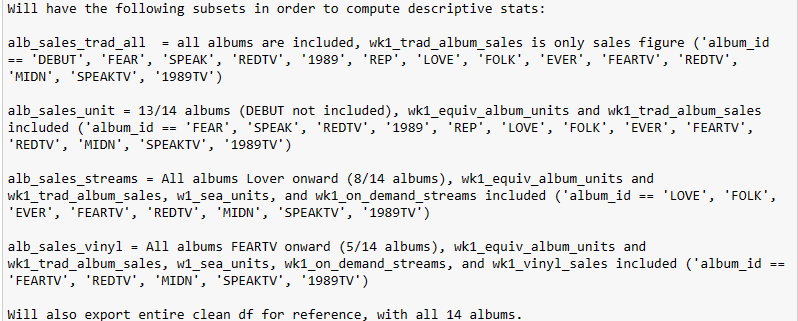

In [128]:
df_album_sales

,album_id,album_title,album_announce_mo,album_announce_day,album_announce_yr,album_announce_date,album_release_mo,album_release_day,album_release_year,album_release_date,chart_date,wk1_equiv_album_units,w1_trad_album_sales,w1_sea_units,wk1_on_demand_streams,wk1_vinyl_sales,wk1_cd_sales
0,DEBUT,Debut,June,19,2006,2006-06-19,October,24,2006,2006-10-24,NaN,unknown,39000,unknown,unknown,unknown,unknown
1,FEAR,Fearless,September,15,2008,2008-09-15,November,11,2008,2008-11-11,NaN,592300,592300,unknown,unknown,unknown,unknown
2,SPEAK,Speak Now,August,4,2010,2010-08-04,October,25,2010,2010-10-25,NaN,507000,1047000,unknown,unknown,unknown,unknown
3,RED,Red,August,13,2012,2012-08-13,October,22,2012,2012-10-22,NaN,1208000,1208000,unknown,unknown,unknown,unknown
4,1989,1989,August,19,2014,2014-08-19,November,15,2014,2014-11-15,NaN,1280000,1297000,unknown,unknown,unknown,unknown
5,REP,reputation,August,24,2017,2017-08-24,November,10,2017,2017-11-10,2017-12-02,1238000,1216000,unknown,unknown,unknown,507000
6,LOVE,Lover,June,13,2019,2019-06-13,August,23,2019,2019-08-23,2019-09-07,867000,679000,175000,226000000,unknown,unknown
7,FOLK,folklore,July,24,2020,2020-07-24,July,24,2020,2020-07-24,2020-08-08,846000,615000,218000,289085000,unknown,unknown
8,EVER,evermore,December,10,2020,2020-12-10,December,11,2020,2020-12-11,2020-12-26,329000,154500,167000,220490000,unknown,unknown
9,FEARTV,Fearless (Taylor's Version),February,11,2021,2021-02-11,April,9,2021,2021-04-09,2021-04-24,291000,179000,109000,142980000,67000,290000


In [129]:
df_album_sales.columns

Index(['album_id', 'album_title', 'album_announce_mo', 'album_announce_day',
       'album_announce_yr', 'album_announce_date', 'album_release_mo',
       'album_release_day', 'album_release_year', 'album_release_date',
       'chart_date', 'wk1_equiv_album_units', 'w1_trad_album_sales',
       'w1_sea_units', 'wk1_on_demand_streams', 'wk1_vinyl_sales',
       ' wk1_cd_sales '],
      dtype='object')

In [130]:
# Subset of all albums and their w1traditional album sales, alb_sales_trad_all  = all albums are included, wk1_trad_album_sales is only sales figure

alb_sales_trad_all = df_album_sales[['album_id','album_title','album_announce_mo','album_announce_day','album_announce_yr','album_announce_date','album_release_mo','album_release_day','album_release_year','album_release_date','chart_date','w1_trad_album_sales']]

In [131]:
alb_sales_trad_all

,album_id,album_title,album_announce_mo,album_announce_day,album_announce_yr,album_announce_date,album_release_mo,album_release_day,album_release_year,album_release_date,chart_date,w1_trad_album_sales
0,DEBUT,Debut,June,19,2006,2006-06-19,October,24,2006,2006-10-24,NaN,39000
1,FEAR,Fearless,September,15,2008,2008-09-15,November,11,2008,2008-11-11,NaN,592300
2,SPEAK,Speak Now,August,4,2010,2010-08-04,October,25,2010,2010-10-25,NaN,1047000
3,RED,Red,August,13,2012,2012-08-13,October,22,2012,2012-10-22,NaN,1208000
4,1989,1989,August,19,2014,2014-08-19,November,15,2014,2014-11-15,NaN,1297000
5,REP,reputation,August,24,2017,2017-08-24,November,10,2017,2017-11-10,2017-12-02,1216000
6,LOVE,Lover,June,13,2019,2019-06-13,August,23,2019,2019-08-23,2019-09-07,679000
7,FOLK,folklore,July,24,2020,2020-07-24,July,24,2020,2020-07-24,2020-08-08,615000
8,EVER,evermore,December,10,2020,2020-12-10,December,11,2020,2020-12-11,2020-12-26,154500
9,FEARTV,Fearless (Taylor's Version),February,11,2021,2021-02-11,April,9,2021,2021-04-09,2021-04-24,179000


In [132]:
alb_sales_trad_all.describe()

,album_announce_day,album_announce_yr,album_release_day,album_release_year,w1_trad_album_sales
count,14.000000,14.000000,14.000000,14.000000,1.400000e+01
mean,15.142857,2016.857143,17.214286,2016.857143,7.429857e+05
std,7.220240,5.789342,7.083877,5.789342,4.620321e+05
min,4.000000,2006.000000,7.000000,2006.000000,3.900000e+04
25%,10.250000,2012.500000,11.000000,2012.500000,4.035000e+05
50%,14.000000,2019.500000,18.000000,2019.500000,6.470000e+05
75%,19.000000,2021.000000,23.750000,2021.000000,1.191000e+06
max,28.000000,2023.000000,27.000000,2023.000000,1.359000e+06


In [133]:
# Creating subset alb_sales_unit = 13/14 albums (DEBUT not included), wk1_equiv_album_units and wk1_trad_album_sales included

alb_sales_unit = df_album_sales.loc[df_album_sales['album_id'].isin(['FEAR', 'SPEAK', 'REDTV', '1989', 'REP', 'LOVE', 'FOLK', 'EVER', 'FEARTV', 'REDTV', 'MIDN', 'SPEAKTV', '1989TV']), 
                                                            ['album_id', 'album_title', 'album_announce_mo', 'album_announce_day','album_announce_yr', 'album_announce_date', 
                                                             'album_release_mo', 'album_release_day', 'album_release_year', 'album_release_date',
                                                             'chart_date', 'wk1_equiv_album_units', 'w1_trad_album_sales']]

In [134]:
# Check subset 

alb_sales_unit

,album_id,album_title,album_announce_mo,album_announce_day,album_announce_yr,album_announce_date,album_release_mo,album_release_day,album_release_year,album_release_date,chart_date,wk1_equiv_album_units,w1_trad_album_sales
1,FEAR,Fearless,September,15,2008,2008-09-15,November,11,2008,2008-11-11,NaN,592300,592300
2,SPEAK,Speak Now,August,4,2010,2010-08-04,October,25,2010,2010-10-25,NaN,507000,1047000
4,1989,1989,August,19,2014,2014-08-19,November,15,2014,2014-11-15,NaN,1280000,1297000
5,REP,reputation,August,24,2017,2017-08-24,November,10,2017,2017-11-10,2017-12-02,1238000,1216000
6,LOVE,Lover,June,13,2019,2019-06-13,August,23,2019,2019-08-23,2019-09-07,867000,679000
7,FOLK,folklore,July,24,2020,2020-07-24,July,24,2020,2020-07-24,2020-08-08,846000,615000
8,EVER,evermore,December,10,2020,2020-12-10,December,11,2020,2020-12-11,2020-12-26,329000,154500
9,FEARTV,Fearless (Taylor's Version),February,11,2021,2021-02-11,April,9,2021,2021-04-09,2021-04-24,291000,179000
10,REDTV,Red (Taylor's Version),June,18,2021,2021-06-18,November,12,2021,2021-11-12,2021-11-18,605000,369000
11,MIDN,Midnights,August,28,2022,2022-08-28,October,21,2022,2022-10-21,2022-10-27,1578000,1140000


In [135]:
alb_sales_unit['wk1_equiv_album_units'].dtype

dtype('O')

In [136]:
# Convert numerical values into data type

alb_sales_unit['wk1_equiv_album_units'] = alb_sales_unit['wk1_equiv_album_units'].astype(int)

In [137]:
# album units stats

alb_sales_unit[['album_id','wk1_equiv_album_units', 'w1_trad_album_sales']].describe()

,wk1_equiv_album_units,w1_trad_album_sales
count,1.200000e+01,1.200000e+01
mean,8.751917e+05,7.629000e+05
std,4.620988e+05,4.325994e+05
min,2.910000e+05,1.545000e+05
25%,5.709750e+05,4.725000e+05
50%,7.810000e+05,6.470000e+05
75%,1.248500e+06,1.159000e+06
max,1.653000e+06,1.359000e+06


In [138]:
# Creating subset alb_sales_streams = All albums Lover onward (8/14 albums), wk1_equiv_album_units and wk1_trad_album_sales, w1_sea_units, and wk1_on_demand_streams included
alb_sales_streams = df_album_sales.loc[df_album_sales['album_id'].isin(['LOVE', 'FOLK', 'EVER', 'FEARTV', 'REDTV', 'MIDN', 'SPEAKTV', '1989TV']), 
                                                    ['album_id', 'album_title', 'album_announce_mo', 'album_announce_day',
                                                    'album_announce_yr', 'album_announce_date', 'album_release_mo',
                                                    'album_release_day', 'album_release_year', 'album_release_date',
                                                   'chart_date', 'w1_trad_album_sales', 'w1_sea_units', 'wk1_on_demand_streams']]

In [139]:
# Check dataframe

alb_sales_streams

,album_id,album_title,album_announce_mo,album_announce_day,album_announce_yr,album_announce_date,album_release_mo,album_release_day,album_release_year,album_release_date,chart_date,w1_trad_album_sales,w1_sea_units,wk1_on_demand_streams
6,LOVE,Lover,June,13,2019,2019-06-13,August,23,2019,2019-08-23,2019-09-07,679000,175000,226000000
7,FOLK,folklore,July,24,2020,2020-07-24,July,24,2020,2020-07-24,2020-08-08,615000,218000,289085000
8,EVER,evermore,December,10,2020,2020-12-10,December,11,2020,2020-12-11,2020-12-26,154500,167000,220490000
9,FEARTV,Fearless (Taylor's Version),February,11,2021,2021-02-11,April,9,2021,2021-04-09,2021-04-24,179000,109000,142980000
10,REDTV,Red (Taylor's Version),June,18,2021,2021-06-18,November,12,2021,2021-11-12,2021-11-18,369000,227000,303230000
11,MIDN,Midnights,August,28,2022,2022-08-28,October,21,2022,2022-10-21,2022-10-27,1140000,419000,549260000
12,SPEAKTV,Speak Now (Taylor's Version),May,5,2023,2023-05-05,July,7,2023,2023-07-07,2023-07-13,507000,206000,269330000
13,1989TV,1989 (Taylor's Version),August,9,2023,2023-08-09,October,27,2023,2023-10-27,2023-11-02,1359000,288000,375490000


In [140]:
# Convert numerical values into data type

alb_sales_streams[['w1_sea_units', 'wk1_on_demand_streams']] = alb_sales_streams[['w1_sea_units', 'wk1_on_demand_streams']].astype(int)

In [141]:
# streaming stats

alb_sales_streams.describe()

,album_announce_day,album_announce_yr,album_release_day,album_release_year,w1_trad_album_sales,w1_sea_units,wk1_on_demand_streams
count,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000,8.000000e+00
mean,14.750000,2021.125000,16.750000,2021.125000,6.253125e+05,226125.000000,2.969831e+08
std,7.923744,1.457738,7.796519,1.457738,4.320619e+05,93601.644522,1.226376e+08
min,5.000000,2019.000000,7.000000,2019.000000,1.545000e+05,109000.000000,1.429800e+08
25%,9.750000,2020.000000,10.500000,2020.000000,3.215000e+05,173000.000000,2.246225e+08
50%,12.000000,2021.000000,16.500000,2021.000000,5.610000e+05,212000.000000,2.792075e+08
75%,19.500000,2022.250000,23.250000,2022.250000,7.942500e+05,242250.000000,3.212950e+08
max,28.000000,2023.000000,27.000000,2023.000000,1.359000e+06,419000.000000,5.492600e+08


In [142]:
# Creating subset alb_sales_vinyl = All albums FEARTV onward (5/14 albums), wk1_equiv_album_units and wk1_trad_album_sales, w1_sea_units, wk1_on_demand_streams, and wk1_vinyl_sales included 

alb_sales_vinyl =df_album_sales.loc[df_album_sales['album_id'].isin(['FEARTV', 'REDTV', 'MIDN', 'SPEAKTV', '1989TV']), 
                                                    ['album_id', 'album_title', 'album_announce_mo', 'album_announce_day',
                                                    'album_announce_yr', 'album_announce_date', 'album_release_mo',
                                                    'album_release_day', 'album_release_year', 'album_release_date',
                                                   'chart_date', 'w1_trad_album_sales', 'wk1_vinyl_sales']]

In [143]:
# Check dataframe

alb_sales_vinyl

,album_id,album_title,album_announce_mo,album_announce_day,album_announce_yr,album_announce_date,album_release_mo,album_release_day,album_release_year,album_release_date,chart_date,w1_trad_album_sales,wk1_vinyl_sales
9,FEARTV,Fearless (Taylor's Version),February,11,2021,2021-02-11,April,9,2021,2021-04-09,2021-04-24,179000,67000
10,REDTV,Red (Taylor's Version),June,18,2021,2021-06-18,November,12,2021,2021-11-12,2021-11-18,369000,114000
11,MIDN,Midnights,August,28,2022,2022-08-28,October,21,2022,2022-10-21,2022-10-27,1140000,575000
12,SPEAKTV,Speak Now (Taylor's Version),May,5,2023,2023-05-05,July,7,2023,2023-07-07,2023-07-13,507000,268500
13,1989TV,1989 (Taylor's Version),August,9,2023,2023-08-09,October,27,2023,2023-10-27,2023-11-02,1359000,693000


In [144]:
# Convert numerical values into data type

alb_sales_vinyl['wk1_vinyl_sales'] = alb_sales_vinyl['wk1_vinyl_sales'].astype(int)

In [145]:
# vinyl stats

alb_sales_vinyl[['album_id','wk1_vinyl_sales', 'w1_trad_album_sales']].describe()

,wk1_vinyl_sales,w1_trad_album_sales
count,5.000000,5.000000e+00
mean,343500.000000,7.108000e+05
std,278608.147763,5.112604e+05
min,67000.000000,1.790000e+05
25%,114000.000000,3.690000e+05
50%,268500.000000,5.070000e+05
75%,575000.000000,1.140000e+06
max,693000.000000,1.359000e+06


All subsets exported as individual csv files in export section.

## Cleaned value counts, descriptive stats, and variables

Note that all descriptive stats are included in each subset due to NaN values. 

In [146]:
df_album_sales['album_id'].value_counts(dropna=False)

album_id
DEBUT      1
FEAR       1
SPEAK      1
RED        1
1989       1
REP        1
LOVE       1
FOLK       1
EVER       1
FEARTV     1
REDTV      1
MIDN       1
SPEAKTV    1
1989TV     1
Name: count, dtype: int64

In [147]:
df_album_sales['album_announce_mo'].value_counts(dropna=False)

album_announce_mo
August       5
June         3
September    1
August       1
July         1
December     1
February     1
May          1
Name: count, dtype: int64

In [148]:
df_album_sales['album_announce_day'].value_counts(dropna=False)

album_announce_day
19    2
13    2
24    2
15    1
4     1
10    1
11    1
18    1
28    1
5     1
9     1
Name: count, dtype: int64

In [149]:
df_album_sales['album_announce_yr'].value_counts(dropna=False)

album_announce_yr
2020    2
2021    2
2023    2
2006    1
2008    1
2010    1
2012    1
2014    1
2017    1
2019    1
2022    1
Name: count, dtype: int64

In [150]:
df_album_sales['album_announce_date'].value_counts(dropna=False)

album_announce_date
2006-06-19    1
2008-09-15    1
2010-08-04    1
2012-08-13    1
2014-08-19    1
2017-08-24    1
2019-06-13    1
2020-07-24    1
2020-12-10    1
2021-02-11    1
2021-06-18    1
2022-08-28    1
2023-05-05    1
2023-08-09    1
Name: count, dtype: int64

In [151]:
df_album_sales['album_release_mo'].value_counts(dropna=False)

album_release_mo
October     5
November    4
July        2
August      1
December    1
April       1
Name: count, dtype: int64

In [152]:
df_album_sales['album_release_mo'].value_counts(dropna=False)

album_release_mo
October     5
November    4
July        2
August      1
December    1
April       1
Name: count, dtype: int64

In [153]:
df_album_sales['album_release_day'].value_counts(dropna=False)

album_release_day
24    2
11    2
25    1
22    1
15    1
10    1
23    1
9     1
12    1
21    1
7     1
27    1
Name: count, dtype: int64

In [154]:
df_album_sales['album_release_year'].value_counts(dropna=False)

album_release_year
2020    2
2021    2
2023    2
2006    1
2008    1
2010    1
2012    1
2014    1
2017    1
2019    1
2022    1
Name: count, dtype: int64

In [155]:
df_album_sales['album_release_date'].value_counts(dropna=False)

album_release_date
2006-10-24    1
2008-11-11    1
2010-10-25    1
2012-10-22    1
2014-11-15    1
2017-11-10    1
2019-08-23    1
2020-07-24    1
2020-12-11    1
2021-04-09    1
2021-11-12    1
2022-10-21    1
2023-07-07    1
2023-10-27    1
Name: count, dtype: int64

In [156]:
df_album_sales['wk1_equiv_album_units'].dtype

dtype('O')

In [157]:
df_album_sales['wk1_equiv_album_units'] = df_album_sales['wk1_equiv_album_units'].astype(int)

ValueError: invalid literal for int() with base 10: ' unknown '

In [158]:
df_album_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   album_id               14 non-null     object
 1   album_title            14 non-null     object
 2   album_announce_mo      14 non-null     object
 3   album_announce_day     14 non-null     int64 
 4   album_announce_yr      14 non-null     int64 
 5   album_announce_date    14 non-null     object
 6   album_release_mo       14 non-null     object
 7   album_release_day      14 non-null     int64 
 8   album_release_year     14 non-null     int64 
 9   album_release_date     14 non-null     object
 10  chart_date             9 non-null      object
 11  wk1_equiv_album_units  14 non-null     object
 12  w1_trad_album_sales    14 non-null     int64 
 13  w1_sea_units           14 non-null     object
 14  wk1_on_demand_streams  14 non-null     object
 15  wk1_vinyl_sales        14

Dataframe (main album_sales and subsets) exported as cleaned version

# 04. bill_top_songs cleaning and wrangling

## Initial summary info

In [159]:
# Check import

df_bill_top_songs.head()

,chart_week,current_position,title,performer,last_week,peak_pos,wks_on_chart,taylor,wk_top_s_cnt
0,11/11/2023,1,Is It Over Now? (Taylor's Version) [From The V...,Taylor Swift,0.0,1,1,1.0,NaN
1,11/11/2023,2,Now That We Don't Talk (Taylor's Version) [Fro...,Taylor Swift,0.0,2,1,1.0,NaN
2,11/11/2023,3,Slut! (Taylor's Version) [From The Vault],Taylor Swift,0.0,3,1,1.0,NaN
3,11/11/2023,4,Paint The Town Red,Doja Cat,2.0,1,13,0.0,NaN
4,11/11/2023,5,Say Don't Go (Taylor's Version) [From The Vault],Taylor Swift,0.0,5,1,1.0,NaN


In [160]:
df_bill_top_songs.tail()

,chart_week,current_position,title,performer,last_week,peak_pos,wks_on_chart,taylor,wk_top_s_cnt
340595,8/4/1958,96,Over And Over,Thurston Harris,NaN,96,1,NaN,NaN
340596,8/4/1958,97,I Believe In You,Robert & Johnny,NaN,97,1,NaN,NaN
340597,8/4/1958,98,Little Serenade,The Ames Brothers,NaN,98,1,NaN,NaN
340598,8/4/1958,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1,NaN,NaN
340599,8/4/1958,100,Judy,Frankie Vaughan,NaN,100,1,NaN,NaN


In [161]:
df_bill_top_songs.shape

(340600, 9)

In [162]:
# Check columns, data types, and counts 

df_bill_top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340600 entries, 0 to 340599
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   chart_week        340600 non-null  object 
 1   current_position  340600 non-null  int64  
 2   title             340600 non-null  object 
 3   performer         340600 non-null  object 
 4   last_week         308140 non-null  float64
 5   peak_pos          340600 non-null  int64  
 6   wks_on_chart      340600 non-null  int64  
 7   taylor            3186 non-null    float64
 8   wk_top_s_cnt      0 non-null       float64
dtypes: float64(3), int64(3), object(3)
memory usage: 23.4+ MB


Observations: All dtypes look accurate. Need to change column titles to match album/song

In [163]:
df_bill_top_songs.describe()

,current_position,last_week,peak_pos,wks_on_chart,taylor,wk_top_s_cnt
count,340600.000000,308140.000000,340600.000000,340600.000000,3186.000000,0.0
mean,50.500000,47.309350,40.715514,9.276509,0.464532,NaN
std,28.866032,28.167856,29.331491,7.843626,0.498819,NaN
min,1.000000,0.000000,1.000000,1.000000,0.000000,NaN
25%,26.000000,23.000000,13.000000,4.000000,0.000000,NaN
50%,51.000000,47.000000,38.000000,7.000000,0.000000,NaN
75%,75.000000,71.000000,65.000000,13.000000,1.000000,NaN
max,100.000000,100.000000,100.000000,91.000000,1.000000,NaN


All stats look accurate. Large range in wks_on_chart

In [164]:
df_bill_top_songs['chart_week'].value_counts(dropna=False)

chart_week
11/11/2023    100
7/5/1980      100
6/21/1980     100
6/14/1980     100
6/7/1980      100
             ... 
1/19/2002     100
1/12/2002     100
1/5/2002      100
12/29/2001    100
8/4/1958      100
Name: count, Length: 3406, dtype: int64

In [165]:
df_bill_top_songs['current_position'].value_counts(dropna=False)

current_position
81    3408
18    3408
26    3407
15    3407
74    3407
      ... 
75    3405
29    3405
51    3405
19    3404
82    3404
Name: count, Length: 100, dtype: int64

In [166]:
df_bill_top_songs['performer'].value_counts(dropna=False)

performer
Taylor Swift                       1337
Elton John                          889
Drake                               881
Madonna                             857
Kenny Chesney                       777
                                   ... 
King Von & Lil Durk                   1
King Von Featuring Moneybagg Yo       1
The Osmond Brothers                   1
The Kimberlys                         1
Frankie Vaughan                       1
Name: count, Length: 10716, dtype: int64

Observation: great dataframe for analysis, since Taylor Swift is the top performer for the entire chart history. Want to keep the main dataframe for comparison

## Columns

In [167]:
# Rename for dataframe merges later on

df_bill_top_songs.rename(columns = {'current_position':'current_song_position','title': 'song_title', 'performer': 'artist', 'peak_pos': 'song_peak_pos', 'wks_on_chart': 'song_wks_on_chart'}, inplace=True)

In [168]:
# Check rename

df_bill_top_songs.columns

Index(['chart_week', 'current_song_position', 'song_title', 'artist',
       'last_week', 'song_peak_pos', 'song_wks_on_chart', 'taylor',
       'wk_top_s_cnt'],
      dtype='object')

## Data types

All accurate datatypes

In [169]:
df_bill_top_songs.dtypes

chart_week                object
current_song_position      int64
song_title                object
artist                    object
last_week                float64
song_peak_pos              int64
song_wks_on_chart          int64
taylor                   float64
wk_top_s_cnt             float64
dtype: object

In [170]:
# Check for mixed data types

for col in df_bill_top_songs.columns.tolist():
    weird = (df_bill_top_songs[[col]].applymap(type) !=df_bill_top_songs[[col]].iloc[0].apply(type)).any(axis = 1)                                                                             
    if len (df_bill_top_songs[weird]) > 0:
        print (col)

C:\Users\leobs\AppData\Local\Temp\ipykernel_9256\1414046520.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_bill_top_songs[[col]].applymap(type) !=df_bill_top_songs[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_9256\1414046520.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_bill_top_songs[[col]].applymap(type) !=df_bill_top_songs[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_9256\1414046520.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_bill_top_songs[[col]].applymap(type) !=df_bill_top_songs[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_9256\1414046520.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_bill_top_songs[[col]].applymap(type) !=df_bill_top_song

## Missing values

In [171]:
df_bill_top_songs.isnull().sum()

chart_week                    0
current_song_position         0
song_title                    0
artist                        0
last_week                 32460
song_peak_pos                 0
song_wks_on_chart             0
taylor                   337414
wk_top_s_cnt             340600
dtype: int64

Last week nulls make sense because it means it's first chart week

## Duplicates

In [172]:
df_bill_top_songs_dupes = df_bill_top_songs[df_bill_top_songs.duplicated()]

In [173]:
df_bill_top_songs_dupes

,chart_week,current_song_position,song_title,artist,last_week,song_peak_pos,song_wks_on_chart,taylor,wk_top_s_cnt


No dupes found

# Rename main df and create subset with just taylor swift

In [174]:
# All artists df

bill_top_songs_all_artists = df_bill_top_songs

In [175]:
# Check subset

bill_top_songs_all_artists.head(100)

,chart_week,current_song_position,song_title,artist,last_week,song_peak_pos,song_wks_on_chart,taylor,wk_top_s_cnt
0,11/11/2023,1,Is It Over Now? (Taylor's Version) [From The V...,Taylor Swift,0.0,1,1,1.0,NaN
1,11/11/2023,2,Now That We Don't Talk (Taylor's Version) [Fro...,Taylor Swift,0.0,2,1,1.0,NaN
2,11/11/2023,3,Slut! (Taylor's Version) [From The Vault],Taylor Swift,0.0,3,1,1.0,NaN
3,11/11/2023,4,Paint The Town Red,Doja Cat,2.0,1,13,0.0,NaN
4,11/11/2023,5,Say Don't Go (Taylor's Version) [From The Vault],Taylor Swift,0.0,5,1,1.0,NaN
...,...,...,...,...,...,...,...,...,...
95,11/11/2023,96,Mr. Take Ya B*tch,Lil Mabu & chriseanrock,0.0,96,1,0.0,NaN
96,11/11/2023,97,The Painter,Cody Johnson,97.0,55,4,0.0,NaN
97,11/11/2023,98,Standing Room Only,Tim McGraw,91.0,61,8,0.0,NaN
98,11/11/2023,99,Mi Ex Tenia Razon,Karol G,80.0,22,11,0.0,NaN


Note: not included collabs currently. Can return and do so if needed.

In [176]:
# Create billboard_song df with ONLY Taylor Swift

bill_top_songs_ts = bill_top_songs_all_artists.loc[bill_top_songs_all_artists['artist'] == 'Taylor Swift']

In [177]:
#Check dataframe 

bill_top_songs_ts.head(100)

,chart_week,current_song_position,song_title,artist,last_week,song_peak_pos,song_wks_on_chart,taylor,wk_top_s_cnt
0,11/11/2023,1,Is It Over Now? (Taylor's Version) [From The V...,Taylor Swift,0.0,1,1,1.0,NaN
1,11/11/2023,2,Now That We Don't Talk (Taylor's Version) [Fro...,Taylor Swift,0.0,2,1,1.0,NaN
2,11/11/2023,3,Slut! (Taylor's Version) [From The Vault],Taylor Swift,0.0,3,1,1.0,NaN
4,11/11/2023,5,Say Don't Go (Taylor's Version) [From The Vault],Taylor Swift,0.0,5,1,1.0,NaN
5,11/11/2023,6,Cruel Summer,Taylor Swift,1.0,1,26,1.0,NaN
...,...,...,...,...,...,...,...,...,...
2083,6/24/2023,84,Hits Different,Taylor Swift,65.0,27,3,1.0,NaN
2110,6/17/2023,11,Anti-Hero,Taylor Swift,11.0,1,33,1.0,NaN
2146,6/17/2023,47,Cruel Summer,Taylor Swift,45.0,29,5,1.0,NaN
2164,6/17/2023,65,Hits Different,Taylor Swift,27.0,27,2,1.0,NaN


In [178]:
bill_top_songs_ts.shape

(1337, 9)

In [179]:
bill_top_songs_ts['artist'].value_counts (dropna=False)

artist
Taylor Swift    1337
Name: count, dtype: int64

## Cleaned value counts, descriptive stats, and variables

In [180]:
bill_top_songs_ts.shape

(1337, 9)

In [181]:
bill_top_songs_ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 89485
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   chart_week             1337 non-null   object 
 1   current_song_position  1337 non-null   int64  
 2   song_title             1337 non-null   object 
 3   artist                 1337 non-null   object 
 4   last_week              1165 non-null   float64
 5   song_peak_pos          1337 non-null   int64  
 6   song_wks_on_chart      1337 non-null   int64  
 7   taylor                 1337 non-null   float64
 8   wk_top_s_cnt           0 non-null      float64
dtypes: float64(3), int64(3), object(3)
memory usage: 104.5+ KB


In [182]:
bill_top_songs_ts.describe()

,current_song_position,last_week,song_peak_pos,song_wks_on_chart,taylor,wk_top_s_cnt
count,1337.000000,1165.000000,1337.000000,1337.000000,1337.0,0.0
mean,39.981301,32.902146,17.656694,12.462229,1.0,NaN
std,26.651001,24.921127,21.187738,11.594714,0.0,NaN
min,1.000000,0.000000,1.000000,1.000000,1.0,NaN
25%,17.000000,12.000000,2.000000,3.000000,1.0,NaN
50%,37.000000,29.000000,9.000000,9.000000,1.0,NaN
75%,61.000000,48.000000,23.000000,18.000000,1.0,NaN
max,100.000000,100.000000,94.000000,53.000000,1.0,NaN


In [183]:
bill_top_songs_ts['chart_week'].value_counts (dropna=False)

chart_week
11/11/2023    22
7/22/2023     22
11/27/2021    21
11/5/2022     19
11/12/2022    19
              ..
4/7/2018       1
3/31/2018      1
3/24/2018      1
1/27/2018      1
9/23/2006      1
Name: count, Length: 628, dtype: int64

In [184]:
bill_top_songs_ts['current_song_position'].value_counts (dropna=False)

current_song_position
1      31
39     30
34     27
4      27
5      25
       ..
100     4
92      4
58      4
95      3
99      2
Name: count, Length: 100, dtype: int64

In [185]:
bill_top_songs_ts['song_title'].value_counts (dropna=False)

song_title
Anti-Hero                                 53
Shake It Off                              50
You Belong With Me                        50
Love Story                                49
Teardrops On My Guitar                    48
                                          ..
Come Back...Be Here (Taylor's Version)     1
Starlight (Taylor's Version)               1
Forever & Always (Taylor's Version)        1
Fearless (Taylor's Version)                1
Long Story Short                           1
Name: count, Length: 204, dtype: int64

In [186]:
bill_top_songs_ts['song_peak_pos'].value_counts (dropna=False)

song_peak_pos
1     233
2     130
6      74
13     68
4      59
     ... 
43      1
73      1
31      1
70      1
93      1
Name: count, Length: 92, dtype: int64

Cleaned dataframes for billboard songs exported.

# 05. bill_top_albums cleaning and wrangling

## Initial summary info

In [187]:
# Check dataframe head

df_bill_top_albums.head()

,chart_week,current_week,title,performer,last_week,peak_pos,wks_on_chart
0,11/11/2023,1,1989 (Taylor's Version),Taylor Swift,0,1,1
1,11/11/2023,2,SEVENTEENTH Heaven: 11th Mini Album (EP),SEVENTEEN,0,2,1
2,11/11/2023,3,For All The Dogs,Drake,2,1,4
3,11/11/2023,4,Nadie Sabe Lo Que Va A Pasar Manana,Bad Bunny,4,1,3
4,11/11/2023,5,One Thing At A Time,Morgan Wallen,5,1,35


In [188]:
df_bill_top_albums.tail()

,chart_week,current_week,title,performer,last_week,peak_pos,wks_on_chart
590686,4/15/1967,171,The Magnificent Men,The Magnificent Men,175,171,2
590687,4/15/1967,172,What's New!!!,Sonny Stitt,172,172,2
590688,4/15/1967,173,Film On Film - Great Movie Themes,Enoch Light & The Light Brigade,0,173,1
590689,4/15/1967,174,Raw Soul,James Brown,174,174,2
590690,4/15/1967,175,Brass Impact,War,0,175,1


In [189]:
df_bill_top_albums.shape

(590691, 7)

In [190]:
df_bill_top_albums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590691 entries, 0 to 590690
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   chart_week    590691 non-null  object
 1   current_week  590691 non-null  int64 
 2   title         590634 non-null  object
 3   performer     590691 non-null  object
 4   last_week     590691 non-null  int64 
 5   peak_pos      590691 non-null  int64 
 6   wks_on_chart  590691 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 31.5+ MB


All datatypes appear accurate, will change column names to match other df

In [191]:
df_bill_top_albums.describe()

,current_week,last_week,peak_pos,wks_on_chart
count,590691.000000,590691.000000,590691.000000,590691.000000
mean,100.471822,85.417773,41.566694,37.605801
std,57.720177,59.166032,50.304167,70.030293
min,1.000000,0.000000,1.000000,1.000000
25%,50.000000,33.000000,4.000000,6.000000
50%,100.000000,83.000000,19.000000,16.000000
75%,150.000000,135.000000,63.000000,38.000000
max,200.000000,200.000000,200.000000,984.000000


All appear accurate, huge (expected)gap in weeks on chart. 

## Columns

In [192]:
#Rename df for future merges and accuracy

df_bill_top_albums.rename(columns = {'current_position':'alb_current_pos','title': 'alb_title', 'performer': 'artist', 'peak_position': 'alb_peak_pos', 'weeks_on_chart': 'alb_wks_on_chart'}, inplace=True)

In [193]:
#Check rename 

df_bill_top_albums.columns

Index(['chart_week', 'current_week', 'alb_title', 'artist', 'last_week',
       'peak_pos', 'wks_on_chart'],
      dtype='object')

## Value counts continued

In [194]:
df_bill_top_albums['alb_title'].value_counts(dropna=False)

alb_title
Greatest Hits                        7762
The Dark Side Of The Moon             985
Legend: The Best Of...                807
Journey's Greatest Hits               785
Metallica                             734
                                     ... 
Tears, Lies, And Alibis                 1
Periphery                               1
Leftback                                1
High In The Rockies: A Live Album       1
What's New!!!                           1
Name: count, Length: 33814, dtype: int64

In [195]:
df_bill_top_albums['artist'].value_counts(dropna=False)

artist
Soundtrack            24538
Various Artists       14335
Drake                  2683
The Beatles            2601
Taylor Swift           2568
                      ...  
Cam'ron & The U.N.        1
Wakey!Wakey!              1
Matt Kennon               1
The Expendables           1
Sonny Stitt               1
Name: count, Length: 9978, dtype: int64

## Data types

In [196]:
df_bill_top_albums.dtypes

chart_week      object
current_week     int64
alb_title       object
artist          object
last_week        int64
peak_pos         int64
wks_on_chart     int64
dtype: object

All data types are accurate

## Subset just with Taylor Swift

Prior to final checks, will create relevant subset just with taylor swif info.

In [197]:
# Billoard albums with all artists df

bill_top_alb_all_artists = df_bill_top_albums

In [198]:
bill_top_alb_all_artists.head()

,chart_week,current_week,alb_title,artist,last_week,peak_pos,wks_on_chart
0,11/11/2023,1,1989 (Taylor's Version),Taylor Swift,0,1,1
1,11/11/2023,2,SEVENTEENTH Heaven: 11th Mini Album (EP),SEVENTEEN,0,2,1
2,11/11/2023,3,For All The Dogs,Drake,2,1,4
3,11/11/2023,4,Nadie Sabe Lo Que Va A Pasar Manana,Bad Bunny,4,1,3
4,11/11/2023,5,One Thing At A Time,Morgan Wallen,5,1,35


In [199]:
bill_top_alb_all_artists.shape

(590691, 7)

In [200]:
# Create billboard_song df with ONLY Taylor Swift

bill_top_alb_ts = bill_top_alb_all_artists.loc[bill_top_alb_all_artists['artist'] == 'Taylor Swift']

In [201]:
bill_top_alb_ts.head()

,chart_week,current_week,alb_title,artist,last_week,peak_pos,wks_on_chart
0,11/11/2023,1,1989 (Taylor's Version),Taylor Swift,0,1,1
6,11/11/2023,7,Midnights,Taylor Swift,6,1,54
7,11/11/2023,8,Lover,Taylor Swift,7,1,219
13,11/11/2023,14,Folklore,Taylor Swift,12,1,171
18,11/11/2023,19,Speak Now (Taylor's Version),Taylor Swift,20,1,17


In [202]:
bill_top_alb_ts.shape

(2568, 7)

In [203]:
bill_top_alb_ts['artist'].value_counts (dropna=False)

artist
Taylor Swift    2568
Name: count, dtype: int64

## Missing values

In [204]:
bill_top_alb_ts.isnull().sum()

chart_week      0
current_week    0
alb_title       0
artist          0
last_week       0
peak_pos        0
wks_on_chart    0
dtype: int64

No missing values

## Duplicates

In [205]:
bill_top_alb_ts_dupes = bill_top_alb_ts[bill_top_alb_ts.duplicated()]

In [206]:
bill_top_alb_ts_dupes

,chart_week,current_week,alb_title,artist,last_week,peak_pos,wks_on_chart


No duplicates found

## Cleaned value counts, descriptive stats, and variables

In [207]:
bill_top_alb_ts.describe()

,current_week,last_week,peak_pos,wks_on_chart
count,2568.000000,2568.000000,2568.000000,2568.000000
mean,73.991433,66.815421,2.192368,124.664330
std,58.297993,56.059475,4.259821,99.622675
min,1.000000,0.000000,1.000000,1.000000
25%,24.000000,19.000000,1.000000,46.000000
50%,58.000000,51.000000,1.000000,104.000000
75%,122.000000,112.000000,1.000000,176.000000
max,200.000000,200.000000,88.000000,464.000000


In [208]:
bill_top_alb_ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2568 entries, 0 to 177618
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   chart_week    2568 non-null   object
 1   current_week  2568 non-null   int64 
 2   alb_title     2568 non-null   object
 3   artist        2568 non-null   object
 4   last_week     2568 non-null   int64 
 5   peak_pos      2568 non-null   int64 
 6   wks_on_chart  2568 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 160.5+ KB


In [209]:
# Rename current week to alb_current_pos

bill_top_alb_ts.rename(columns = {'current_week':'alb_current_pos'}, inplace=True)

C:\Users\leobs\AppData\Local\Temp\ipykernel_9256\1992324141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bill_top_alb_ts.rename(columns = {'current_week':'alb_current_pos'}, inplace=True)


In [210]:
bill_top_alb_ts['alb_title'].value_counts (dropna=False)

alb_title
1989                                                    464
Taylor Swift                                            284
reputation                                              267
Fearless                                                261
Lover                                                   219
Speak Now                                               193
Red                                                     185
Folklore                                                171
Evermore                                                151
Fearless (Taylor's Version)                             121
Red (Taylor's Version)                                  103
Midnights                                                54
The Taylor Swift Holiday Collection (EP)                 43
Beautiful Eyes (EP)                                      21
Speak Now (Taylor's Version)                             17
Speak Now: World Tour Live CD + DVD                      11
Lover: Live From Paris        

Both billboard album dataframes exported as cleaned versions.

# 06. Export dataframes

In [211]:
#Export subset of unneeded songs dataframe

df_song_streams_no_use.to_csv(os.path.join(path, '02 Manipulated Data', 'song_streams_no_use_albums.csv'))

In [212]:
#Export song_streams cleaned df

stud_alb_song_streams.to_csv(os.path.join(path, '02 Manipulated Data', 'song_streams_clean.csv'))

In [213]:
#Export album_sales subset for traditional album sales cleaned df

alb_sales_trad_all.to_csv(os.path.join(path, '02 Manipulated Data', 'alb_sales_trad_all_clean.csv'))

In [214]:
#Export album_sales for album_units subset cleaned df

alb_sales_unit.to_csv(os.path.join(path, '02 Manipulated Data', 'alb_sales_unit_clean.csv'))

In [215]:
#Export album_sales for album_streams subset cleaned df

alb_sales_streams.to_csv(os.path.join(path, '02 Manipulated Data', 'alb_sales_streams_clean.csv'))

In [216]:
#Export album_sales subset for vinyl_sales cleaned df

alb_sales_vinyl.to_csv(os.path.join(path, '02 Manipulated Data', 'alb_sales_vinyl_clean.csv'))

In [217]:
#Export album_sales cleaned df

df_album_sales.to_csv(os.path.join(path, '02 Manipulated Data', 'df_album_sales_clean.csv'))

In [218]:
#Export bill_top_songs_all_artists cleaned df

bill_top_songs_all_artists.to_csv(os.path.join(path, '02 Manipulated Data', 'bill_top_songs_all_artists_clean.csv'))

In [219]:
#Export bill_top_songs_ts cleaned df

bill_top_songs_ts.to_csv(os.path.join(path, '02 Manipulated Data', 'bill_top_songs_ts_clean.csv'))

In [220]:
#Export bill_top_albums cleaned df

bill_top_alb_all_artists.to_csv(os.path.join(path, '02 Manipulated Data', 'bill_top_alb_all_artists_clean.csv'))

In [221]:
#Export bill_top_albums with only Taylor Swift cleaned df

bill_top_alb_ts.to_csv(os.path.join(path, '02 Manipulated Data', 'bill_top_alb_ts_clean.csv'))